Importing Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Data Collection & Processing

In [3]:
# Loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv("/content/gld_price_data.csv")
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
# first 10 rows of the dataframe
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [5]:
#Using hide_index() from the style function
gold_data.head().style.hide_index()

Date,SPX,GLD,USO,SLV,EUR/USD
1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [8]:
#Gradient background color for the numerical columns
gold_data.head(10).style.background_gradient(cmap='pink')

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [9]:
# last 5 rows of the dataframe
gold_data.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [16]:
# last 10 rows of the dataframe (Gradient background color)
gold_data.tail(10).style.background_gradient(cmap = 'Reds')

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.800000,15.380000,1.208123
2281,5/1/2018,2654.800049,123.709999,13.610000,15.240000,1.199156
2282,5/2/2018,2635.669922,123.650002,13.670000,15.420000,1.195100
2283,5/3/2018,2629.729980,124.279999,13.820000,15.460000,1.198926
2284,5/7/2018,2672.629883,124.570000,14.100000,15.520000,1.193374
2285,5/8/2018,2671.919922,124.589996,14.060000,15.510000,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.530000,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.740000,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.560000,1.193118
2289,5/16/2018,2725.780029,122.543800,14.405800,15.454200,1.182033


In [17]:
# number of rows(2290) and columns(6)
gold_data.shape

(2290, 6)

In [18]:
# the label of each column in the DataFrame
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [19]:
# getting some informations about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


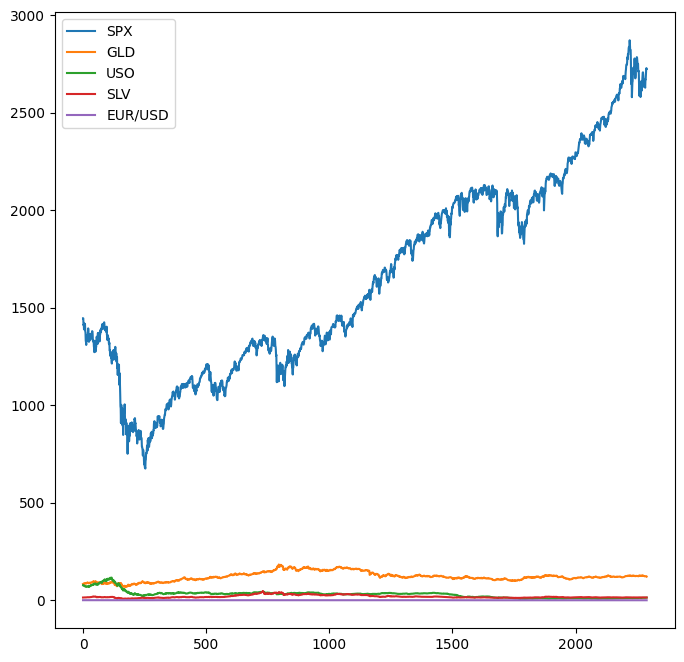

In [23]:
plt.rcParams['figure.figsize'] = [8, 8]#resize the plot
gold_data.plot()
plt.show()

In [24]:
# Check for null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
# Transpose index and columns.(Gradient background color)
gold_data.describe().T.style.background_gradient(cmap = 'coolwarm')

,count,mean,std,min,25%,50%,75%,max
SPX,2290.000000,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.000000,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.000000,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.000000,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.000000,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [28]:
#mean
gold_data.mean()

SPX        1654.315776
GLD         122.732875
USO          31.842221
SLV          20.084997
EUR/USD       1.283653
dtype: float64

**we will not use the colum of date becouse our data does not depend on it.
so we will deal with the other missing values.**

In [29]:
# drop the "date",after the cor
data = gold_data.drop(['Date'], axis=1)

In [30]:
#To check for duplicates
data.duplicated().sum()

0

**visualization**

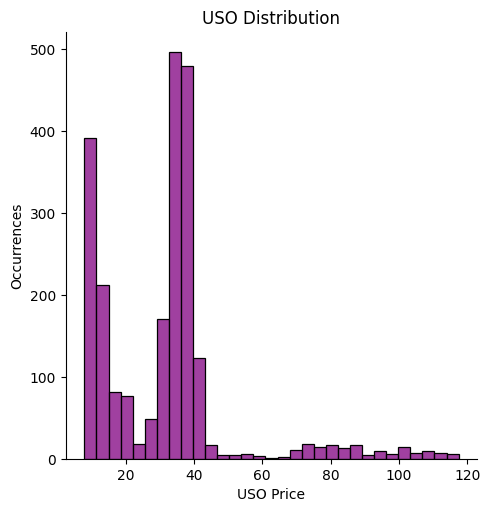

In [33]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='purple')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

In [34]:
q = data["USO"].quantile(0.98)
data[data["USO"] > q]
data = data[(data["USO"] < q)]

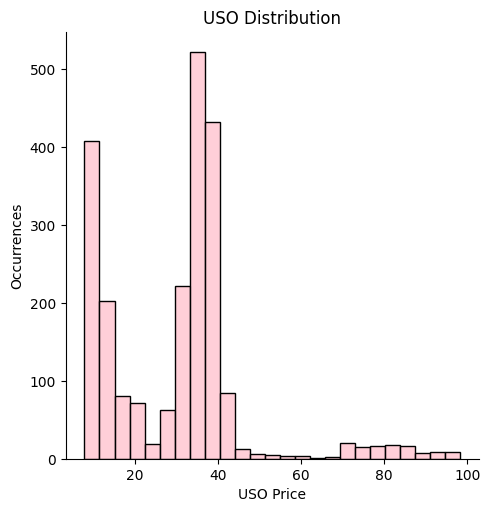

In [35]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='pink')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

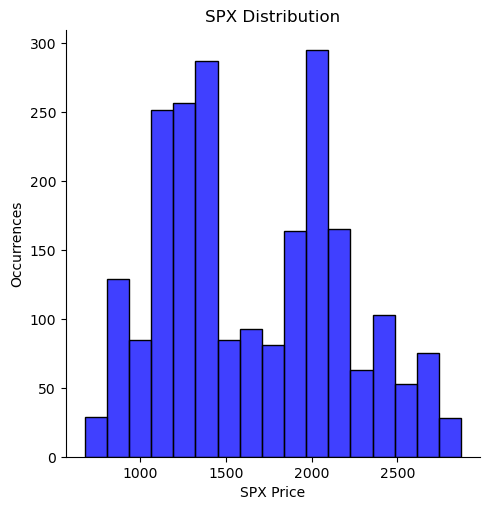

In [ ]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SPX'], color='blue')
plt.title('SPX Distribution')
plt.xlabel('SPX Price')
plt.ylabel('Occurrences')
plt.show()

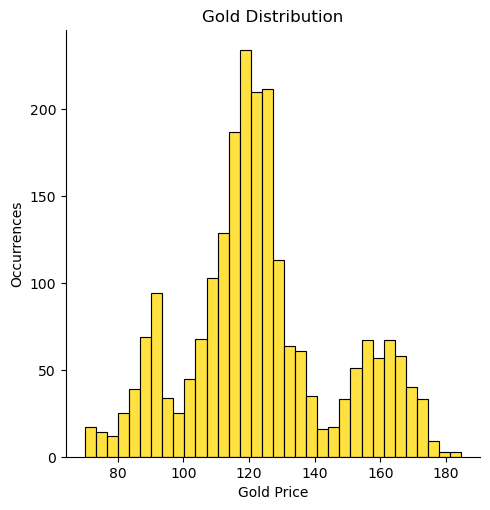

In [ ]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('Gold Price')
plt.ylabel('Occurrences')
plt.show()

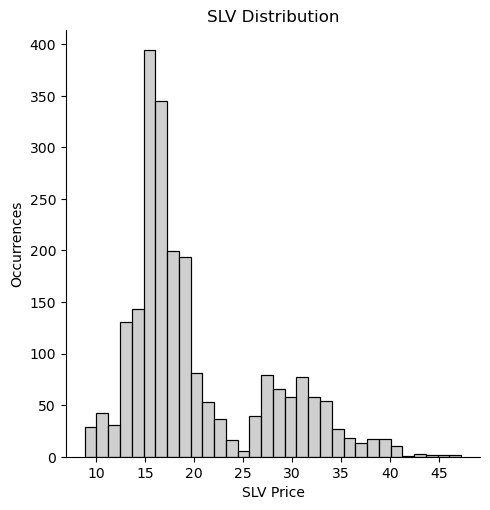

In [ ]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SLV'], color='silver')
plt.title('SLV Distribution')
plt.xlabel('SLV Price')
plt.ylabel('Occurrences')
plt.show()

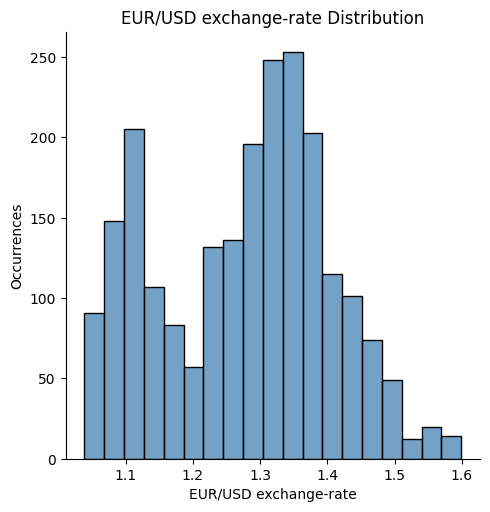

In [95]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['EUR/USD'], color='steelblue')
plt.title('EUR/USD exchange-rate Distribution')
plt.xlabel('EUR/USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

**Correlation**

In [53]:
# Compute pairwise correlation of columns
# to identity the highly correlated features.
correlation = data.corr()

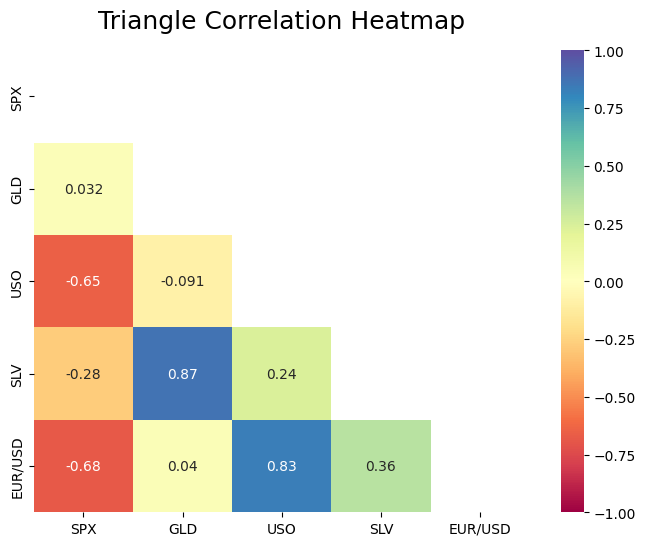

In [83]:
# Construct a heatmap to undestand the correlation
plt.figure(figsize=(8, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Spectral')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


In [58]:
# correlation values of Gold
print(correlation['GLD'])

SPX        0.032141
GLD        1.000000
USO       -0.091204
SLV        0.874769
EUR/USD    0.040271
Name: GLD, dtype: float64


Splitting the data into a Training dataset & Testing dataset

In [59]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [96]:
# The Features (input)
X
# The Features (input)(Gradient background color)
X.style.background_gradient(cmap='Reds')

In [62]:
# The target
Y
# The target(Gradient background color)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2244, dtype: float64

In [63]:
# Split arrays or matrices into random train and test subsets
#random_state #Testing the model with 20% of the dataset & training it with 80% of the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)


**Model Training: Random Forest Regressor**

In [64]:
regressor = RandomForestRegressor(n_estimators=100)

In [65]:
regressor

RandomForestRegressor()

In [66]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evalutation

In [67]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [68]:
print(test_data_prediction)

[ 86.51070021 104.49469767 127.12609722 132.52020193  95.94469977
 125.61530163 165.07880107  91.78919895  75.7392989  120.08660066
 146.59209679 126.9533995  125.08239974 116.22459791 133.84800208
 102.73779913 107.25219968 133.90290093  87.53969909 139.2315999
 112.60020038 124.65460107 117.34079974 114.24490082 117.18210006
 120.46320174 159.55879827 119.12209979 155.79860162 146.00670121
 117.50239966 118.52280114  88.26079992 160.93709762 148.81609896
 117.98840063 109.96899965 111.37850092 160.44189558 111.51309896
 139.89269888 115.18120054 122.98253777  72.39600201 126.1677
 168.54459764 108.40080026 107.44250116 125.25539933 152.84860031
  94.00979968 160.65399606  90.75989864 112.58990187 109.63129737
  84.37479979 156.12950021 156.1501021  127.88729999 172.17769835
 165.64570272 123.56859909 107.65000061  79.40679933 118.68439937
 129.26099873  93.34509932 154.6235021  126.21590136 136.72510443
 125.60220144 100.82029879 123.89100124 114.42250057 171.17930185
 120.86823806 1

In [69]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score)

R squared error :  0.987941522330758


**Compare the Actual Values and Predicted Values in a Plot**

In [70]:
Y_test = np.array(Y_test)
#Y_test = list(Y_test) #Converting the actual values to a list,so that it can be in the same format as the test_data_prediction


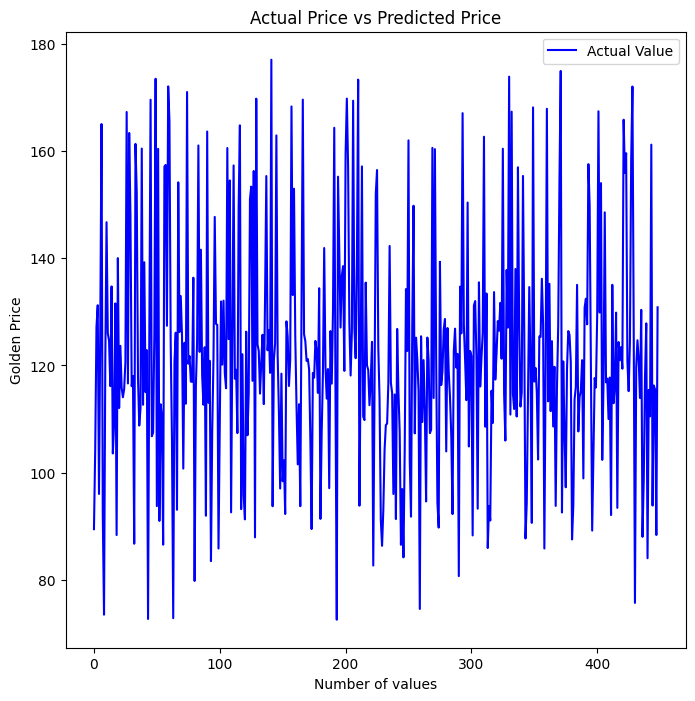

In [73]:
plt.rcParams['figure.figsize'] = [8, 8]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

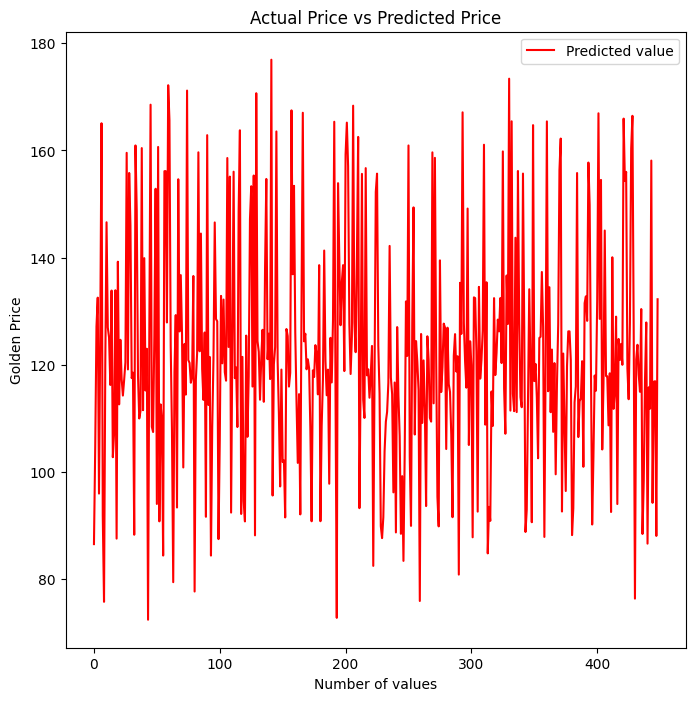

In [74]:
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

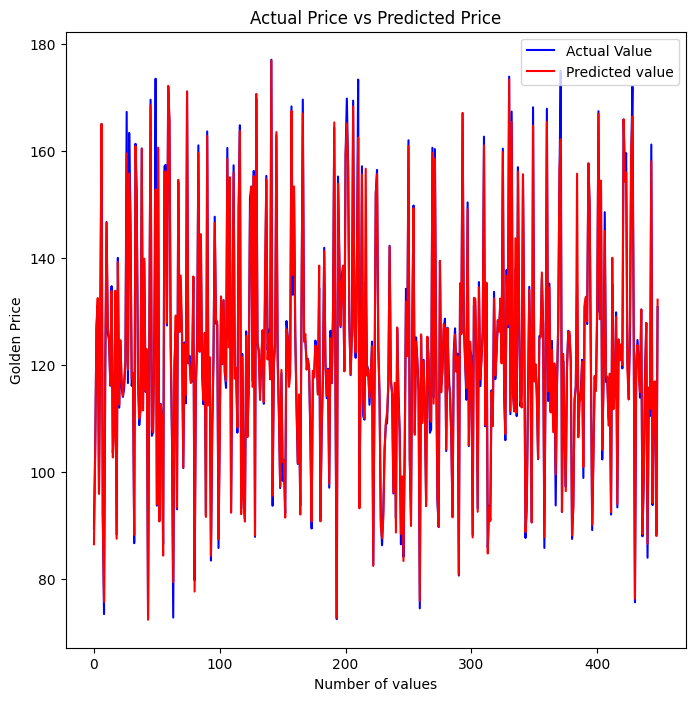

In [75]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

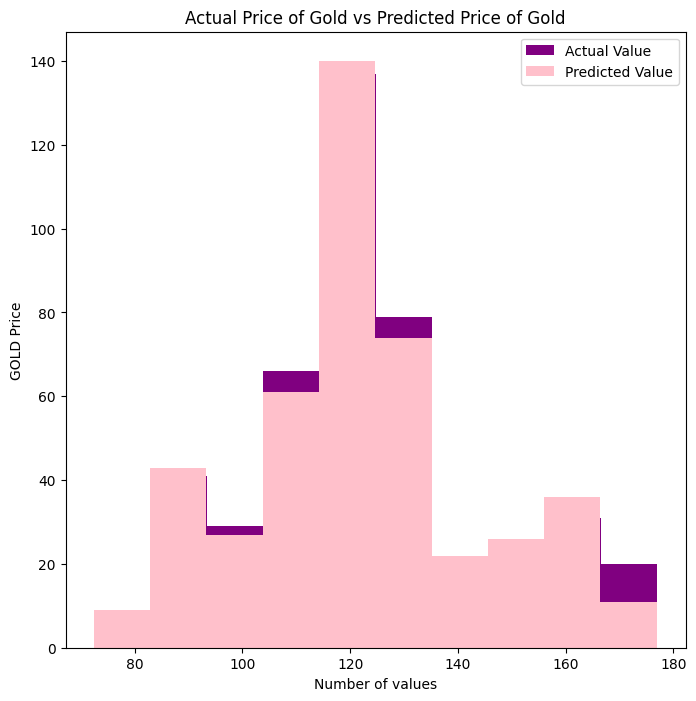

In [78]:
plt.figure(figsize = (8,8))
plt.hist(Y_test, color='purple', label = 'Actual Value')
plt.hist(test_data_prediction, color='pink', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

**Building a System to use the model**

In [79]:
def convertor(user_input):

    for i in range(len(user_input)):
        user_input[i] = float(user_input[i])

    print("values = ", tuple(user_input))
    return tuple(user_input)

In [82]:
'''
print("how many values will you calculate: (NOTE: Press q to break)")
count = int(input())

while (count != 0):

    count = count-1
    input_string = input()
    user_input = input_string.split()
    if(input_string.lower() == "q"):
        print("END")
        break
    input_data = convertor(user_input)
    # changing input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search

    # implementing the trained model
    prediction = regressor.predict(input_data_reshaped)
    print(prediction)

    print('The cost of the gold is:', prediction[0])
'''

'\nprint("how many values will you calculate: (NOTE: Press q to break)")\ncount = int(input())\n\nwhile (count != 0):\n\n    count = count-1\n    input_string = input()\n    user_input = input_string.split()\n    if(input_string.lower() == "q"):\n        print("END")\n        break\n    input_data = convertor(user_input)\n    # changing input_data to a numpy array\n    input_data_as_numpy_array = np.asarray(input_data)\n\n    # reshape the array\n    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search\n\n    # implementing the trained model\n    prediction = regressor.predict(input_data_reshaped)\n    print(prediction)\n\n    print(\'The cost of the gold is:\', prediction[0])\n'

In [81]:
# 1310.5 70.550003 15.902 1.464794              # row_15  ~ 88.169998
# 1336.910034 69.800003 16.674999 1.483107      # row_21  ~ 92.059998
# 1556.219971 33.040001 28.02 1.298802          # row_1144 ~ 152.990005